**Loading Dataset**

In [1]:
import pandas as pd
df=pd.read_csv('Step_datasets_14.csv')

In [2]:
for var in df.columns:

    print(df[var].value_counts())

KEY
2034    1
1       1
2       1
3       1
4       1
       ..
19      1
18      1
17      1
16      1
15      1
Name: count, Length: 2030, dtype: int64
ENTITY
CARTESIAN_POINT                                       347
DIRECTION                                             339
ORIENTED_EDGE                                         326
EDGE_CURVE                                            163
AXIS2_PLACEMENT_3D                                    116
VERTEX_POINT                                          108
VECTOR                                                107
LINE                                                  107
EDGE_LOOP                                              77
FACE_OUTER_BOUND                                       63
ADVANCED_FACE                                          63
CIRCLE                                                 52
PLANE                                                  32
CYLINDRICAL_SURFACE                                    24
FACE_BOUND                 

**Importing Libraries**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization

**Plotting Figures**

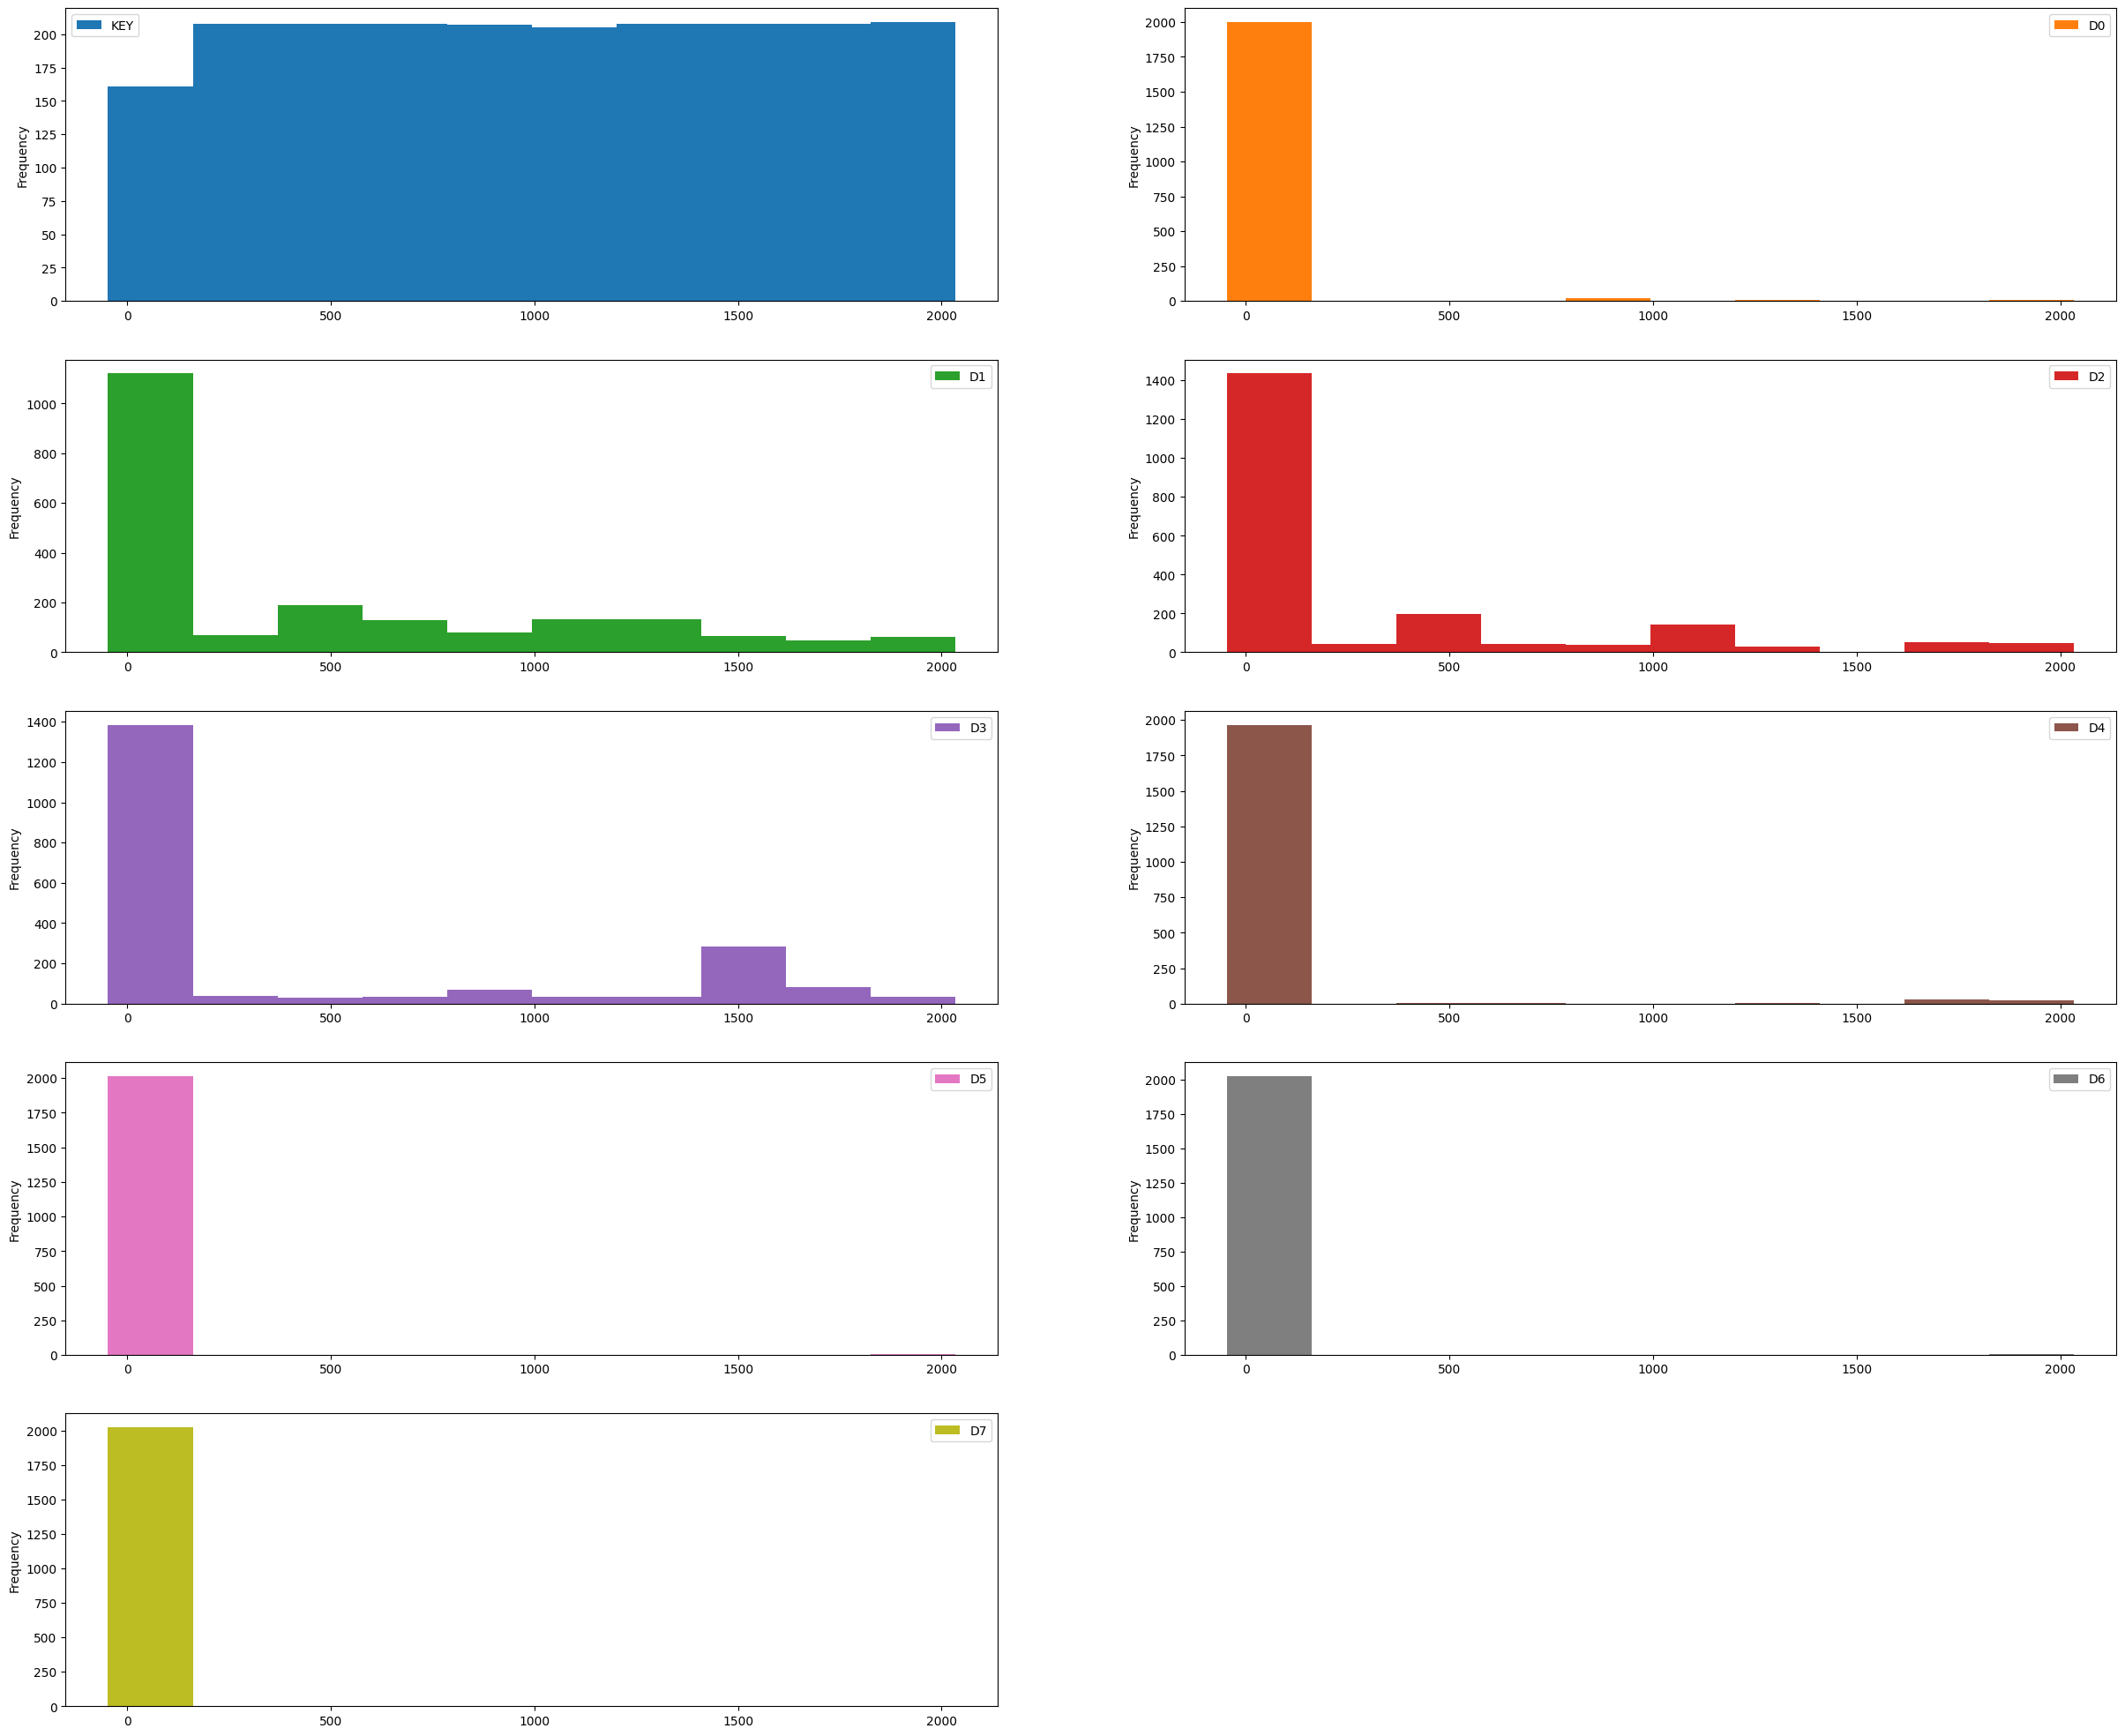

In [4]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

**Dropping column**

In [5]:
X = df.drop(['ENTITY'], axis=1)

y = df['ENTITY']

**Splitting testing and training dataset**

In [6]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Check the shape of X train and test**

In [7]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1624, 10), (406, 10))

In [8]:
cols = X_train.columns

**Fit model into standard scaler**

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Create a list of column names for features that should be scaled (excluding 'REFERENCES')
cols_for_scaling = [col for col in X_train.columns if col != 'REFERENCES']

# Filter X_train and X_test to include only the numeric columns for scaling
X_train_numeric = X_train[cols_for_scaling]
X_test_numeric = X_test[cols_for_scaling]

# Apply StandardScaler to the numeric features
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Convert the scaled numpy arrays back to DataFrames with proper column names and original index
X_train = pd.DataFrame(X_train_scaled, columns=cols_for_scaling, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=cols_for_scaling, index=X_test.index)

**Applying KNN Classifier**

In [11]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Splitting into X train dataset**

In [18]:
X_train = pd.DataFrame(X_train, columns=[cols])

**Splitting into X test dataset**

In [19]:
X_test = pd.DataFrame(X_test, columns=[cols])

**Drop References column X test dataset**

In [20]:
X_test.drop('REFERENCES', axis=1, inplace=True)

/tmp/ipython-input-3819137473.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test.drop('REFERENCES', axis=1, inplace=True)


**Test dataset parameter correlation**

In [12]:
X_test

,KEY,D0,D1,D2,D3,D4,D5,D6,D7
1464,0.771376,-0.124311,0.020255,0.367536,-0.257424,-0.17156,-0.089295,-0.057145,-0.051449
229,-1.355029,-0.124311,2.408897,-0.547950,-0.640151,-0.17487,-0.089295,-0.057145,-0.051449
1406,0.671835,-0.124311,0.398313,0.813180,0.404633,-0.17487,-0.089295,-0.057145,-0.051449
511,-0.871053,-0.124311,-0.789134,-0.507116,-0.640153,-0.17487,-0.089295,-0.057145,-0.051449
1849,1.432124,-0.124311,-0.746173,-0.549966,1.699424,-0.17156,-0.089295,-0.057145,-0.051449
...,...,...,...,...,...,...,...,...,...
1290,0.472753,-0.124311,-0.782627,-0.507116,-0.582279,-0.17487,-0.089295,-0.057145,-0.051449
1608,1.018513,-0.124311,-0.067386,0.244530,0.765754,-0.17156,-0.089295,-0.057145,-0.051449
1754,1.269082,-0.124311,-0.746173,-0.549966,1.659299,-0.17156,-0.089295,-0.057145,-0.051449
326,-1.188555,-0.124311,-0.586357,-0.481405,-0.640151,-0.17487,-0.089295,-0.057145,-0.051449


**Prediction of Keys**

In [17]:
y_pred = knn.predict(X_test)

y_pred

array(['EDGE_CURVE', 'FACE_OUTER_BOUND', 'AXIS2_PLACEMENT_3D',
       'CARTESIAN_POINT', 'ORIENTED_EDGE', 'CARTESIAN_POINT',
       'CARTESIAN_POINT', 'CARTESIAN_POINT', 'PLANE', 'DIRECTION',
       'EDGE_CURVE', 'DIRECTION', 'ORIENTED_EDGE', 'ORIENTED_EDGE',
       'LINE', 'VECTOR', 'VECTOR', 'CARTESIAN_POINT',
       'PERSON_AND_ORGANIZATION', 'EDGE_CURVE', 'LINE', 'CIRCLE',
       'EDGE_CURVE', 'ADVANCED_FACE', 'CARTESIAN_POINT',
       'FACE_OUTER_BOUND', 'EDGE_CURVE', 'CARTESIAN_POINT',
       'AXIS2_PLACEMENT_3D', 'AXIS2_PLACEMENT_3D', 'VECTOR',
       'VERTEX_POINT', 'FACE_OUTER_BOUND', 'DIRECTION',
       'CYLINDRICAL_SURFACE', 'DIRECTION', 'FACE_OUTER_BOUND',
       'CARTESIAN_POINT', 'APPROVAL_ROLE', 'VERTEX_POINT', 'EDGE_LOOP',
       'DIRECTION', 'AXIS2_PLACEMENT_3D', 'PLANE', 'CARTESIAN_POINT',
       'ORIENTED_EDGE', 'ORIENTED_EDGE', 'EDGE_CURVE', 'EDGE_LOOP',
       'DIRECTION', 'DIRECTION', 'ORIENTED_EDGE', 'ORIENTED_EDGE',
       'DIRECTION', 'DIRECTION', 'CYLINDRICAL_

**Displaying confusion matrix against test dataset and predictions**

In [14]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0 62  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  2  0  0  0  0  0  0  0  0  0

**Prediction probability**

In [15]:
# print the first 10 predicted probabilities of two classes- 2 and 4

y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
   